In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

In [64]:
# Read the data

# Define the raw data as a multi-line string (tab-delimited)
data = """folder	image count	feature_extraction
i7-4600M CPU	10000	2701.761941
Apple M3 Pro (w/out MPS)	10000	1775.830696
Apple M3 Pro (w MPS)	10000	333.89360189437866 seconds
i7-4600M CPU	10000	2947.627373456955 seconds"""

# Read the data into a DataFrame
df_unsort = pd.read_csv(io.StringIO(data), sep='\t')

# Clean the 'feature_extraction' and 'vector upload' columns:
df_unsort['feature_extraction'] = (
    df['feature_extraction']
    .astype(str)
    .str.replace(' seconds', '', regex=False)
    .str.strip()
    .astype(float)
)

# Create a new label column that includes the folder name and image count
df_unsort['label'] = df_unsort['folder'] + "\n(" + df_unsort['image count'].astype(str) + " images)"

df = df_unsort.sort_values('feature_extraction', ascending=False)
df

,folder,image count,feature_extraction,label
3,i7-4600M CPU,10000,2947.627373,i7-4600M CPU\n(10000 images)
0,i7-4600M CPU,10000,2701.761941,i7-4600M CPU\n(10000 images)
1,Apple M3 Pro (w/out MPS),10000,1775.830696,Apple M3 Pro (w/out MPS)\n(10000 images)
2,Apple M3 Pro (w MPS),10000,333.893602,Apple M3 Pro (w MPS)\n(10000 images)


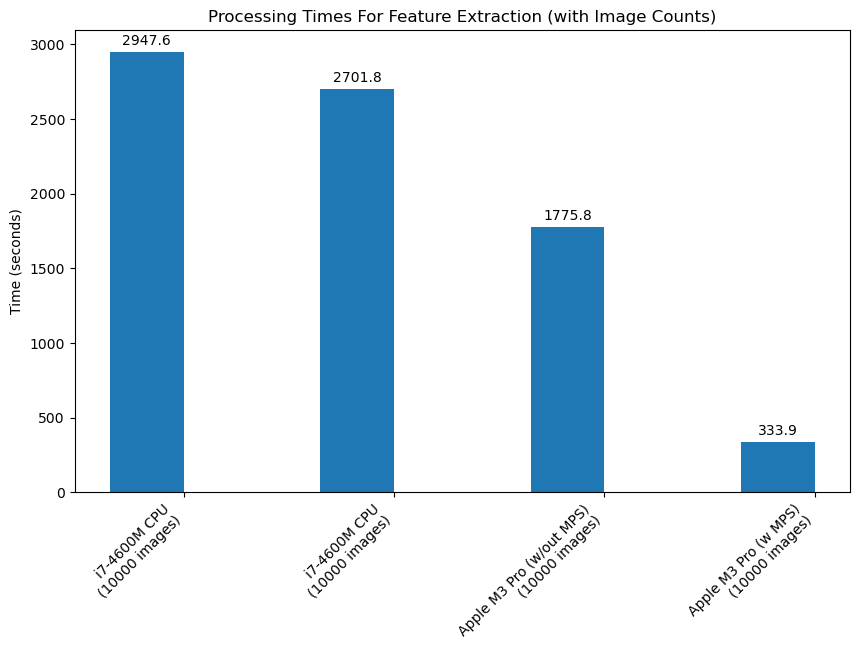

In [ ]:
# Bar chart
# Visualize the data using a grouped bar chart to compare feature extraction and vector upload times
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # Width of each bar

indices = range(len(df))

# Plot feature extraction times
bars1 = ax.bar(indices, df['feature_extraction'], width, label='Feature Extraction')

# Set x-ticks to the middle of the grouped bars with our new label (folder name + image count)
ax.set_xticks([i + width/2 for i in indices])
ax.set_xticklabels(df['label'], rotation=45, ha='right')

# Add labels and title
ax.set_ylabel('Time (seconds)')
ax.set_title('Processing Times For Feature Extraction (with Image Counts)')

# Optionally annotate each bar with its height value for clarity
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset text above the bar
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

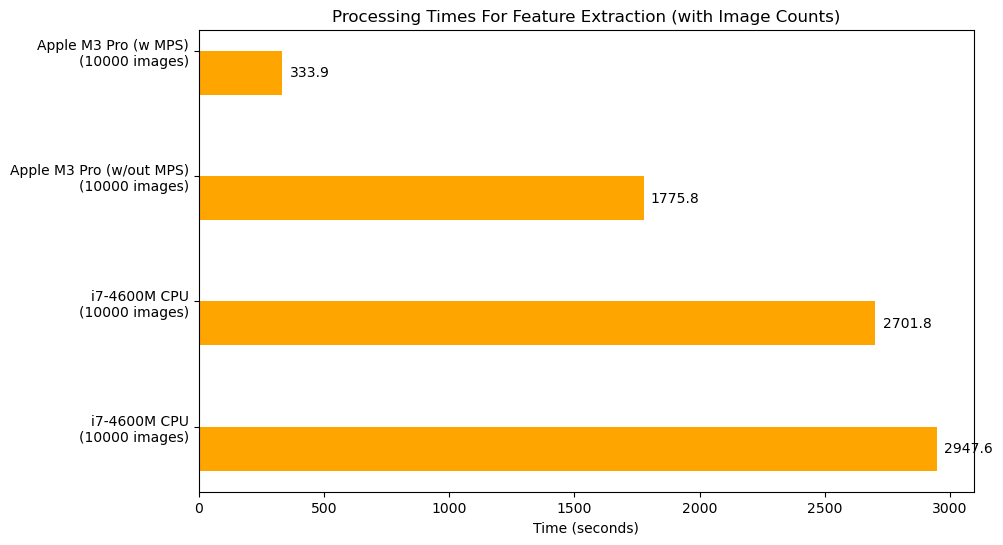

In [74]:
plt.figure(figsize=(10, 6))
width = 0.35  # the height of the bars in a horizontal bar chart
indices = np.arange(len(df))

# Plot horizontal bars for feature extraction times
bars = plt.barh(indices, df['feature_extraction'], height=width, label='Feature Extraction', color='orange')

# Set y-ticks with labels that include folder and image count
plt.yticks(indices + width / 2, df['label'])
plt.xlabel('Time (seconds)')
plt.title('Processing Times For Feature Extraction (with Image Counts)')

# Annotate each bar with its feature extraction time
# We add a small offset to the right of each bar for clarity.
offset = 0.01 * df['feature_extraction'].max()
for bar in bars:
    value = bar.get_width()
    plt.text(value + offset, 
             bar.get_y() + bar.get_height() / 2, 
             f'{value:.1f}', 
             va='center', ha='left', fontsize=10)
plt.show()

In [59]:
# F1 scores by disease labels (train-test split is 80/20)

# Create the data as a dictionary
f1_score_data = {
    "Class": [
        "Atelectasis", "Consolidation", "Infiltration", "Pneumothorac", "Edema",
        "Ephysema", "Fibrosis", "Effusion", "Pneumia", "Pleural_Thikcening",
        "Cardiomegaly", "Nodule", "Mass", "Hernia"
    ],
    "f1score": [
        0.95, 0.98, 0.90, 0.98, 0.99,
        0.99, 0.99, 0.94, 0.99, 0.98,
        0.99, 0.97, 0.97, 1.0
    ]
}

# Convert dictionary to DataFrame
f1_df = pd.DataFrame(f1_score_data)
f1_score_df = f1_df.sort_values("f1score", ascending=False)

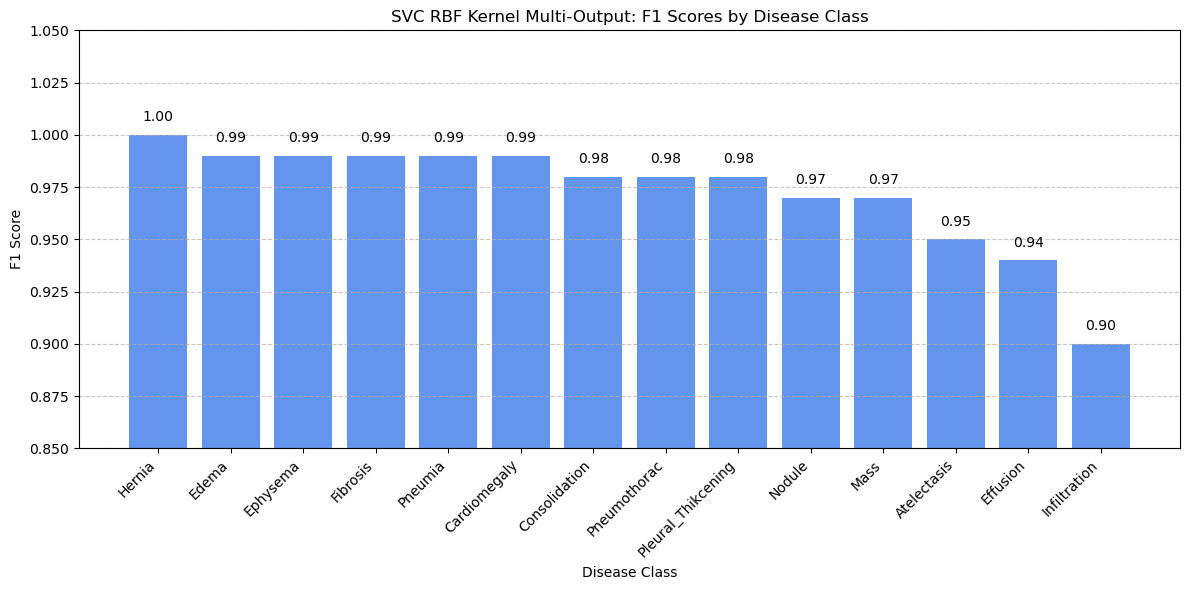

In [60]:
# ---------------------------
# Option 1: Vertical Bar Chart
# ---------------------------
plt.figure(figsize=(12, 6))
bars = plt.bar(f1_score_df["Class"], f1_score_df["f1score"], color="cornflowerblue")

# Annotate each bar with the F1 score value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.2f}", ha="center", va="bottom", fontsize=10)

plt.xlabel("Disease Class")
plt.ylabel("F1 Score")
plt.title("SVC RBF Kernel Multi-Output: F1 Scores by Disease Class")
plt.ylim(0.85, 1.05)  # Adjust y-limit for clear annotation space
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

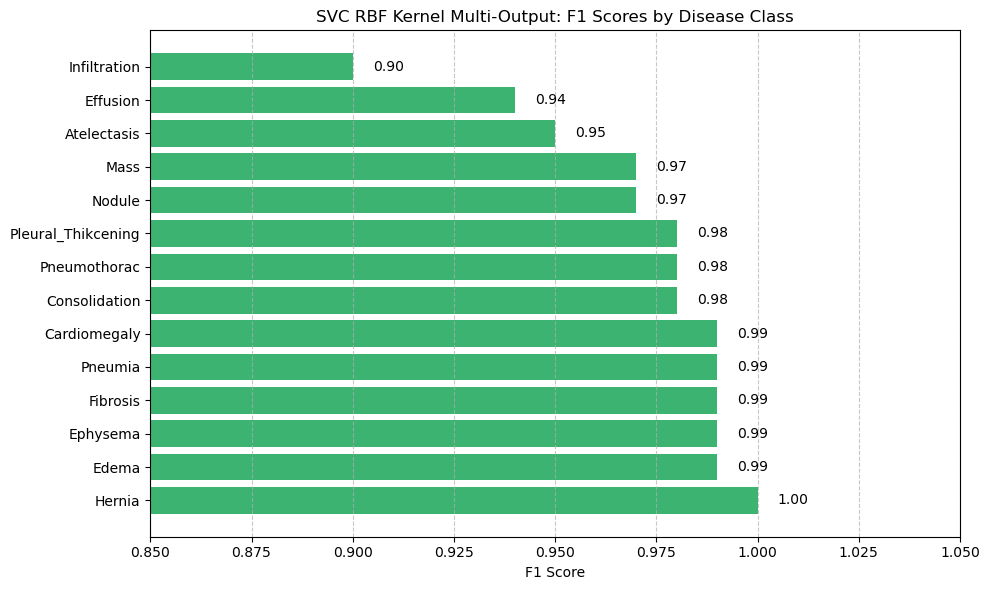

In [61]:
# ---------------------------
# Option 2: Horizontal Bar Chart
# ---------------------------
plt.figure(figsize=(10, 6))
bars = plt.barh(f1_score_df["Class"], f1_score_df["f1score"], color="mediumseagreen")

# Annotate each bar with the F1 score value
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2, f"{width:.2f}", ha="left", va="center", fontsize=10)

plt.xlabel("F1 Score")
plt.title("SVC RBF Kernel Multi-Output: F1 Scores by Disease Class")
plt.xlim(0.85, 1.05)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()